<a href="https://colab.research.google.com/github/MTKaori/ACCESS---Projeto-Livraria/blob/main/Projeto_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Projeto Diagnóstico de Câncer de Mama.**




Utilizando apenas bases aleatórios de diagnósticos de Câncer de Mama.
Fazendo analogia junto as informações que os indicadores nos mostram e utilizando delas o amostragem para detectar quais indicadores podem se mostrar com viés ou destaque que subjulguem um diagnóstico positivo.

Nos leva a pensar sobre o tempo que mulher leva para executar um exame na rede pública de saúde e quão avançado estaria seu estágio caso aponte positivo para tal exame seja executado, e talvez chegar a um diagnóstico antecipado atraves de parâmetros junto a base de exames mais recentes.

A liberação de imagens se dá somente por força pessoal onde nao possuimos uma base de dados que seja ampla.

Este projeto demonstra a necessidade de mais base dados para o estudo e por sugestão poderemos criar um formulário no ato da execução do exame onde o mesmo autorize sua divulgação, desta forma simples teríamos acesso essa nova base de dados que levaría a um novo estudo.

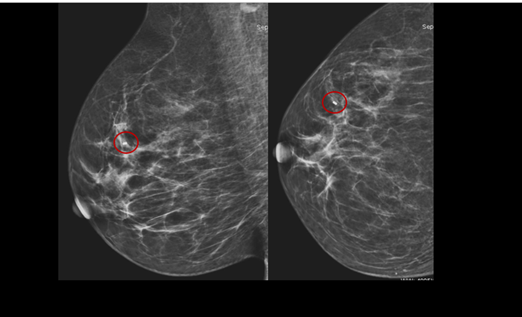

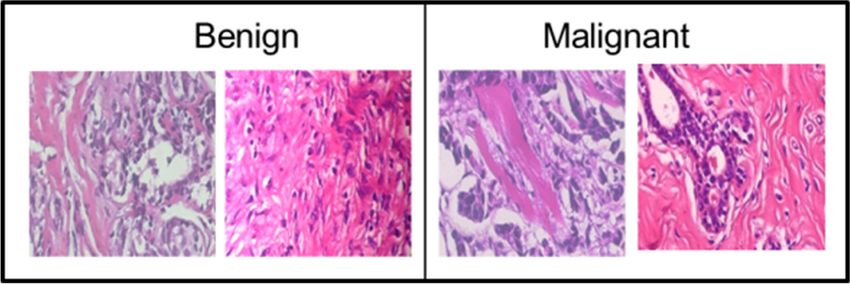

https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

In [ ]:
print("--- Carregando e Explorando os Dados ---")
cancer_dados = load_breast_cancer()
df_cancer = pd.DataFrame(np.c_[cancer_dados['data'], cancer_dados['target']], columns = np.append(cancer_dados['feature_names'], ['target']))
df_cancer.head()

--- Carregando e Explorando os Dados ---


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
caracteristicas = df_cancer.drop('target', axis = 1)
target = df_cancer['target']

In [ ]:
print("--- Criando e Treinando o Modelo de ML ---")
from sklearn.ensemble import RandomForestClassifier # Modelo de ML
from sklearn.model_selection import train_test_split # Organizador

caracteristicas_train, caracteristicas_test, diagnostico_train, diagnostico_test = train_test_split(caracteristicas, np.ravel(target), test_size = 0.2, random_state=42)

print(f"Tamanho do conjunto de treino: {caracteristicas_train.shape[0]}")
print(f"Tamanho do conjunto de teste: {caracteristicas_test.shape[0]}")

--- Criando e Treinando o Modelo de ML ---
Tamanho do conjunto de treino: 455
Tamanho do conjunto de teste: 114


In [ ]:
modelo = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
modelo

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
modelo.fit(caracteristicas_train, np.ravel(diagnostico_train))

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
print("--- Testando o Modelo ---")
predicao = modelo.predict(caracteristicas_test)
predicao

--- Testando o Modelo ---


array([1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0.])

In [ ]:
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(diagnostico_test, predicao)
print(f"Acurácia: {acuracia *100:.2f}%")

Acurácia: 96.49%
